In [70]:
import pandas as pd
from prophet import Prophet
from prophet.make_holidays import make_holidays_df
from prophet.plot import plot_plotly, add_changepoints_to_plot, plot_components_plotly, plot_forecast_component, plot_yearly
from IPython.display import Image 
import matplotlib.pyplot as plt


In [71]:
# Load the time series data
df = pd.read_csv("JapanLandTemperature.csv", index_col='dt', parse_dates=True)

# Set the frequency of the DataFrame to the start of the month ('MS').
df = df.asfreq('MS')

# Identify columns that contain the word 'Uncertainty' in their name.
uncertainty_columns = df.filter(like='Uncertainty').columns

# Drop the identified uncertainty columns from the DataFrame.
df = df.drop(columns=uncertainty_columns)

# Filter rows containing all NaN (missing) values
all_nan_rows = df[df.isna().all(axis=1)]

# Interpolate missing values using linear interpolation and modify DataFrame in place
df.interpolate(method='linear', inplace=True)

df = df.drop(columns=['Country'])

C:\Users\yuta\AppData\Local\Temp\ipykernel_10808\1899845678.py:17: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [72]:
# Reset the index to convert the date index to a column
df.reset_index(inplace=True)

# Rename the columns to "ds" and "y"
df.rename(columns={'dt': 'ds', 'AverageTemperature': 'y'}, inplace=True)

In [73]:
df.head()

,ds,y
0,1841-01-01,-1.100
1,1841-02-01,-0.079
2,1841-03-01,2.680
3,1841-04-01,8.400
4,1841-05-01,13.796


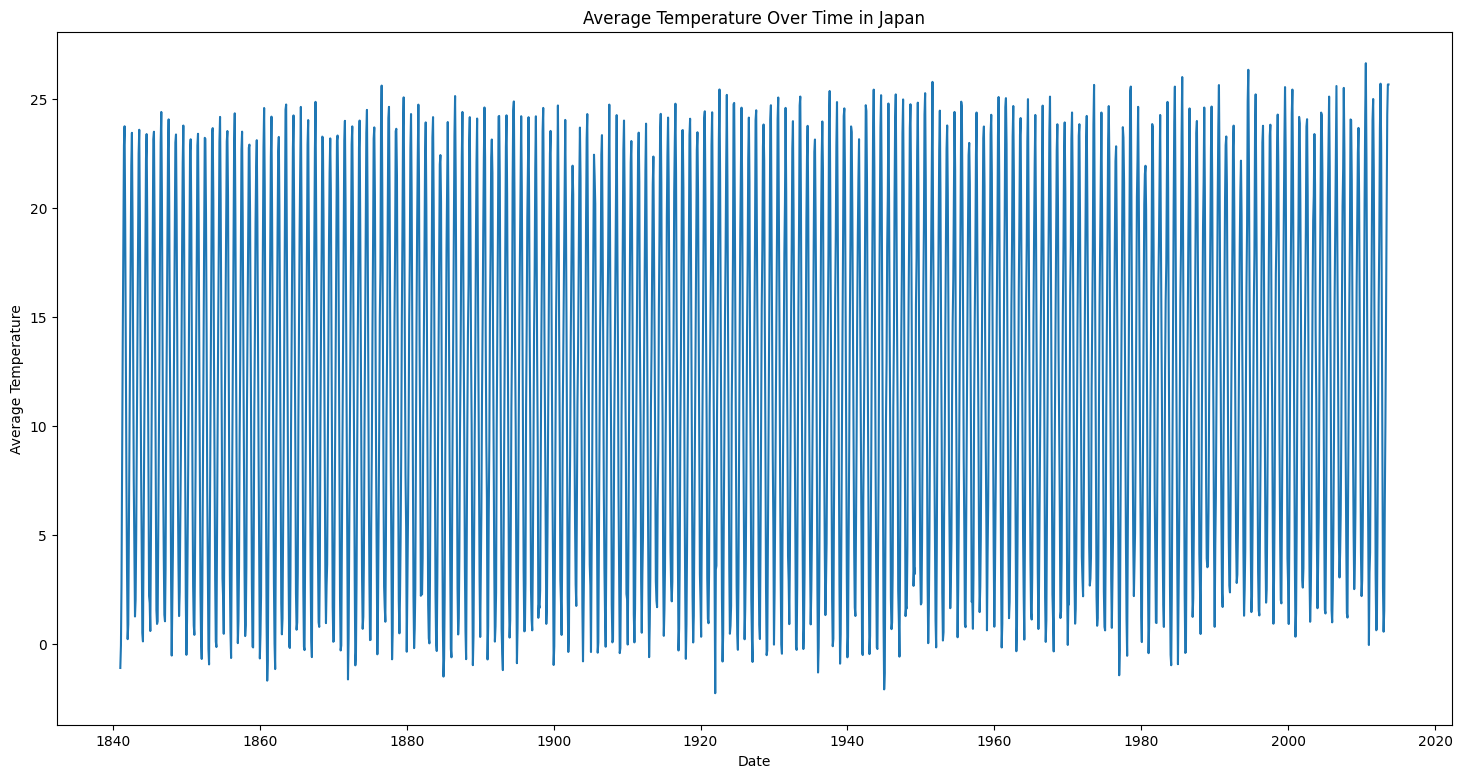

In [74]:
# Plot the data
plt.figure(figsize=(18, 9))
plt.plot(df['ds'], df['y'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time in Japan')
plt.show()

In [75]:
df.describe()

,ds,y
count,2073,2073.000000
mean,1927-05-02 12:28:49.667149056,11.958524
min,1841-01-01 00:00:00,-2.259000
25%,1884-03-01 00:00:00,3.953000
50%,1927-05-01 00:00:00,12.788000
75%,1970-07-01 00:00:00,19.527000
max,2013-09-01 00:00:00,26.642000
std,NaN,8.192686


In [76]:
# Instantiate Prophet: create a new Prophet object.
m = Prophet()

In [77]:
# Fit the model
m.fit(df)

20:56:28 - cmdstanpy - INFO - Chain [1] start processing
20:56:28 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
# Making predictions
# periods: specifies the number of days into the future.
future = m.make_future_dataframe(periods=10 * 12)

In [79]:
# Inspect Future Dataframe
future

,ds
0,1841-01-01
1,1841-02-01
2,1841-03-01
3,1841-04-01
4,1841-05-01
...,...
2188,2013-12-26
2189,2013-12-27
2190,2013-12-28
2191,2013-12-29


In [80]:
forecast = m.predict(future)

In [81]:
# Inspect Future Dataframe
future

,ds
0,1841-01-01
1,1841-02-01
2,1841-03-01
3,1841-04-01
4,1841-05-01
...,...
2188,2013-12-26
2189,2013-12-27
2190,2013-12-28
2191,2013-12-29


In [82]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1841-01-01,11.421479,-1.002186,1.346310,11.421479,11.421479,-11.282404,-11.282404,-11.282404,-11.282404,-11.282404,-11.282404,0.0,0.0,0.0,0.139075
1,1841-02-01,11.421943,-0.391475,1.841724,11.421943,11.421943,-10.664907,-10.664907,-10.664907,-10.664907,-10.664907,-10.664907,0.0,0.0,0.0,0.757036
2,1841-03-01,11.422362,2.788405,5.121606,11.422362,11.422362,-7.465354,-7.465354,-7.465354,-7.465354,-7.465354,-7.465354,0.0,0.0,0.0,3.957008
3,1841-04-01,11.422826,8.322404,10.590156,11.422826,11.422826,-2.005241,-2.005241,-2.005241,-2.005241,-2.005241,-2.005241,0.0,0.0,0.0,9.417585
4,1841-05-01,11.423275,12.773026,15.101279,11.423275,11.423275,2.558043,2.558043,2.558043,2.558043,2.558043,2.558043,0.0,0.0,0.0,13.981318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2013-12-26,13.088463,0.124405,2.478132,13.088463,13.088463,-11.775668,-11.775668,-11.775668,-11.775668,-11.775668,-11.775668,0.0,0.0,0.0,1.312795
2189,2013-12-27,13.088529,0.176182,2.591573,13.088529,13.088529,-11.723257,-11.723257,-11.723257,-11.723257,-11.723257,-11.723257,0.0,0.0,0.0,1.365272
2190,2013-12-28,13.088595,0.330691,2.599396,13.088595,13.088595,-11.659959,-11.659959,-11.659959,-11.659959,-11.659959,-11.659959,0.0,0.0,0.0,1.428636
2191,2013-12-29,13.088661,0.282463,2.690727,13.088661,13.088661,-11.589077,-11.589077,-11.589077,-11.589077,-11.589077,-11.589077,0.0,0.0,0.0,1.499584


In [83]:
# yhat: predicted values, yhat_lower: lower uncertainty interval, yhat_upper: upper uncertainty interval
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2188,2013-12-26,1.312795,0.124405,2.478132
2189,2013-12-27,1.365272,0.176182,2.591573
2190,2013-12-28,1.428636,0.330691,2.599396
2191,2013-12-29,1.499584,0.282463,2.690727
2192,2013-12-30,1.574685,0.400010,2.805607


C:\Users\yuta\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\yuta\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



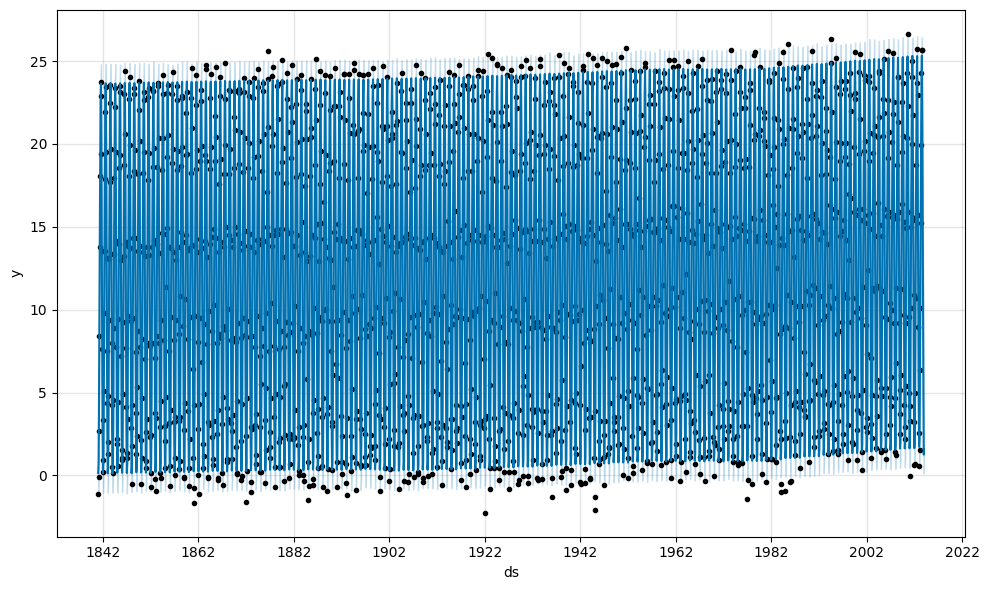

In [84]:
# Plot the forecast
fig1 = m.plot(forecast)

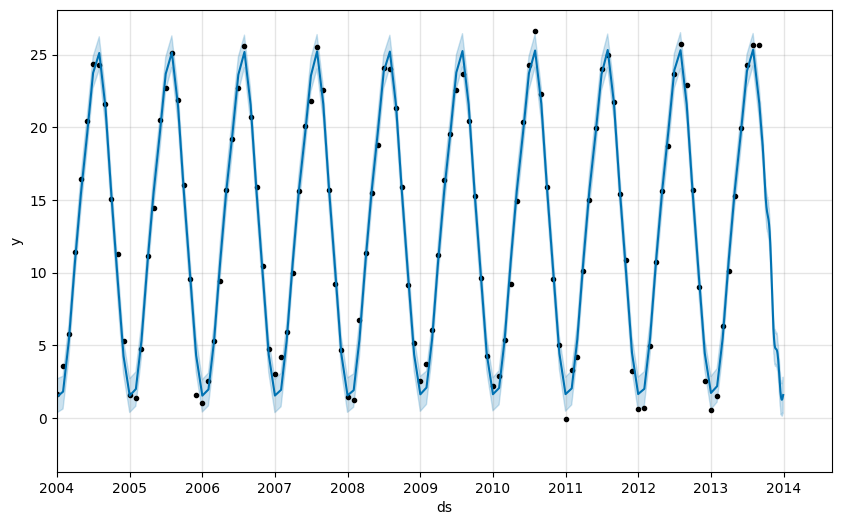

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
m.plot(forecast, ax=ax)
ax.set_xlim(pd.Timestamp('2004-01-01'), pd.Timestamp('2014-09-01'))
plt.show()

C:\Users\yuta\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\yuta\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\yuta\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



KeyboardInterrupt: 

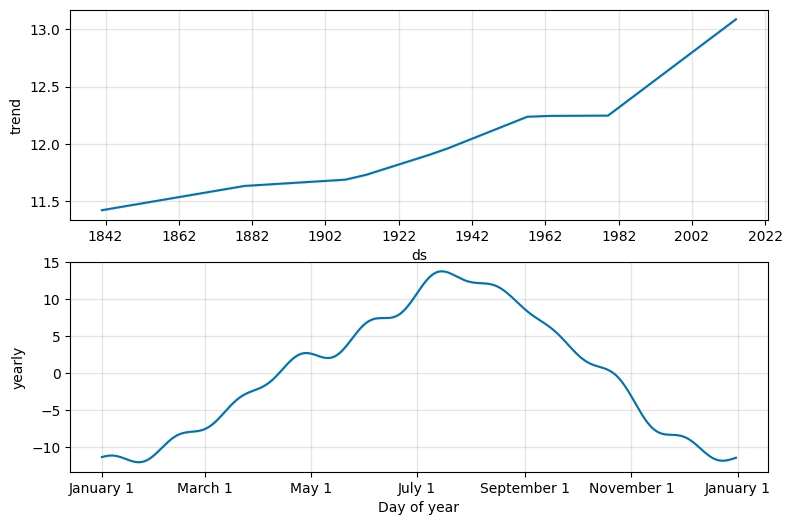

In [86]:
fig2 = m.plot_components(forecast)

In [ ]:
# Interactive figure of the forecast 
plot_plotly(m, forecast)

In [ ]:
# Interactive figure of the forecast components
plot_components_plotly(m, forecast)

### Saturating Forecasts

In [ ]:
# Set the carrying capacity to a specific value (e.g., 8.5)
df['cap'] = 8.5

In [ ]:
df

,ds,y,cap
0,1841-01-01,-1.100,8.5
1,1841-02-01,-0.079,8.5
2,1841-03-01,2.680,8.5
3,1841-04-01,8.400,8.5
4,1841-05-01,13.796,8.5
...,...,...,...
2068,2013-05-01,15.256,8.5
2069,2013-06-01,19.961,8.5
2070,2013-07-01,24.286,8.5
2071,2013-08-01,25.669,8.5


In [ ]:
# Specify logistic growth model
m = Prophet(growth='logistic')

# Fit the model
m.fit(df)

20:55:15 - cmdstanpy - INFO - Chain [1] start processing
20:55:15 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Create future dataframe with specified periods
future = m.make_future_dataframe(periods=500)

# Specify constant capacity in the future
future['cap'] = 30

# Make predictions
fcst = m.predict(future)

KeyboardInterrupt: 